## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# display settings
plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")
plt.rcParams["figure.figsize"] = (14, 7)

## Loading the data

In [2]:
# Load the data
df = pd.read_csv("../data/raw/energy_data.csv", parse_dates=True, index_col="timestamp")

In [3]:
# Check shape
print(f"Data shape: {df.shape}")

Data shape: (26304, 7)


In [4]:
# Explore the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26304 entries, 2022-01-01 00:00:00 to 2024-12-31 23:00:00
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energy_consumption  26041 non-null  float64
 1   temperature_C       26304 non-null  float64
 2   humidity_pct        26304 non-null  float64
 3   hour                26304 non-null  int64  
 4   dayofweek           26304 non-null  int64  
 5   is_weekend          26304 non-null  int64  
 6   is_holiday          26304 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.6 MB
None


In [5]:
# Check the columns in the dataset
print("Columns in the dataset: \n")
df.columns

Columns in the dataset: 



Index(['energy_consumption', 'temperature_C', 'humidity_pct', 'hour',
       'dayofweek', 'is_weekend', 'is_holiday'],
      dtype='object')

In [6]:
# Check the summary statistics
display(df.describe())

,energy_consumption,temperature_C,humidity_pct,hour,dayofweek,is_weekend,is_holiday
count,26041.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000
mean,298.383205,18.002317,64.986499,11.500000,3.000000,0.286496,0.021898
std,64.188643,7.528693,6.284307,6.922318,2.002318,0.452133,0.146353
min,98.530011,0.250000,41.180000,0.000000,0.000000,0.000000,0.000000
25%,249.602600,11.450000,60.690000,5.750000,1.000000,0.000000,0.000000
50%,297.374982,17.970000,65.020000,11.500000,3.000000,0.000000,0.000000
75%,348.840483,24.570000,69.250000,17.250000,5.000000,1.000000,0.000000
max,505.477664,34.490000,90.030000,23.000000,6.000000,1.000000,1.000000


In [7]:
# Check the first few rows of the dataset
df.head()

,energy_consumption,temperature_C,humidity_pct,hour,dayofweek,is_weekend,is_holiday
timestamp,,,,,,,
2022-01-01 00:00:00,208.515343,16.08,66.08,0,5,1,1
2022-01-01 01:00:00,178.759515,14.51,70.85,1,5,1,1
2022-01-01 02:00:00,172.203652,14.96,64.12,2,5,1,1
2022-01-01 03:00:00,193.027518,15.50,70.87,3,5,1,1
2022-01-01 04:00:00,182.605914,12.09,72.43,4,5,1,1


## Data Cleaning And Preprocessing

In [8]:
# Check missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 energy_consumption    263
temperature_C           0
humidity_pct            0
hour                    0
dayofweek               0
is_weekend              0
is_holiday              0
dtype: int64


In [9]:
# Handle missing values by interpolation
df['energy_consumption'] = df['energy_consumption'].interpolate().ffill().bfill()

In [10]:
# Check missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 energy_consumption    0
temperature_C         0
humidity_pct          0
hour                  0
dayofweek             0
is_weekend            0
is_holiday            0
dtype: int64


In [11]:
# Check NaN Values
print("Total NaN values in the dataset:\n", df.isna().sum())

Total NaN values in the dataset:
 energy_consumption    0
temperature_C         0
humidity_pct          0
hour                  0
dayofweek             0
is_weekend            0
is_holiday            0
dtype: int64


In [12]:
# Check duplicates in the dataset
duplicates = df.duplicated().sum()
print(f"Total duplicate rows in the dataset: {duplicates}")

Total duplicate rows in the dataset: 0


## Save the cleaned data

In [13]:
# Save the cleaned data
df.to_csv("../data/processed/cleaned_energy_data.csv")

## Data Exploration

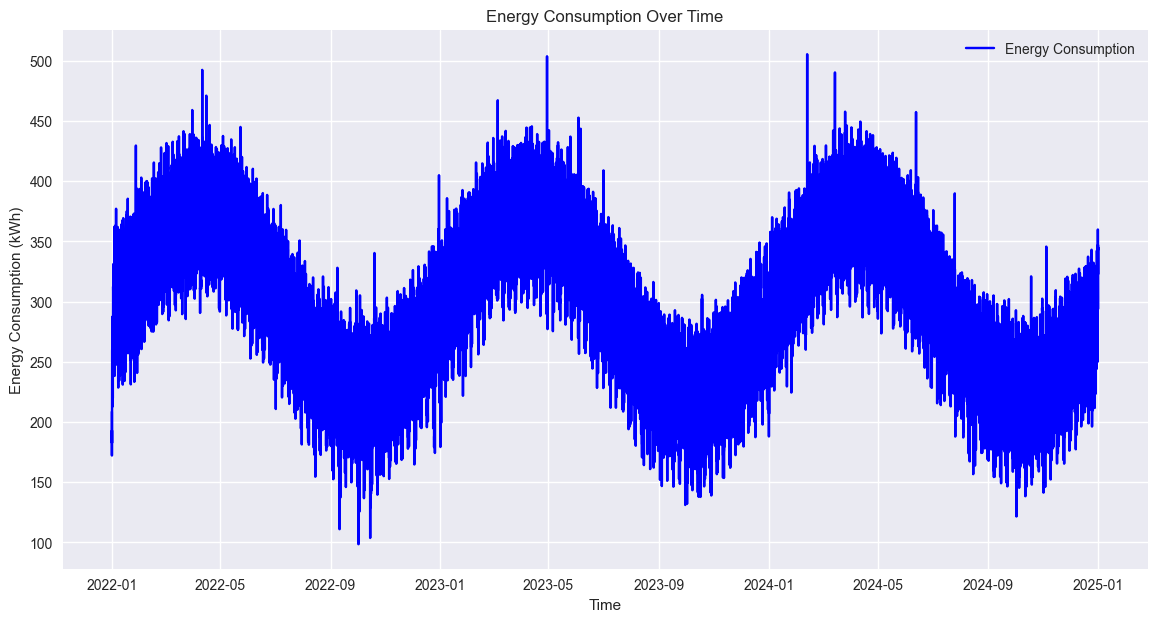

In [ ]:
# Visualize the energy consumption over time
plt.plot(df.index, df['energy_consumption'], label='Energy Consumption', color='blue')
plt.title('Energy Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()

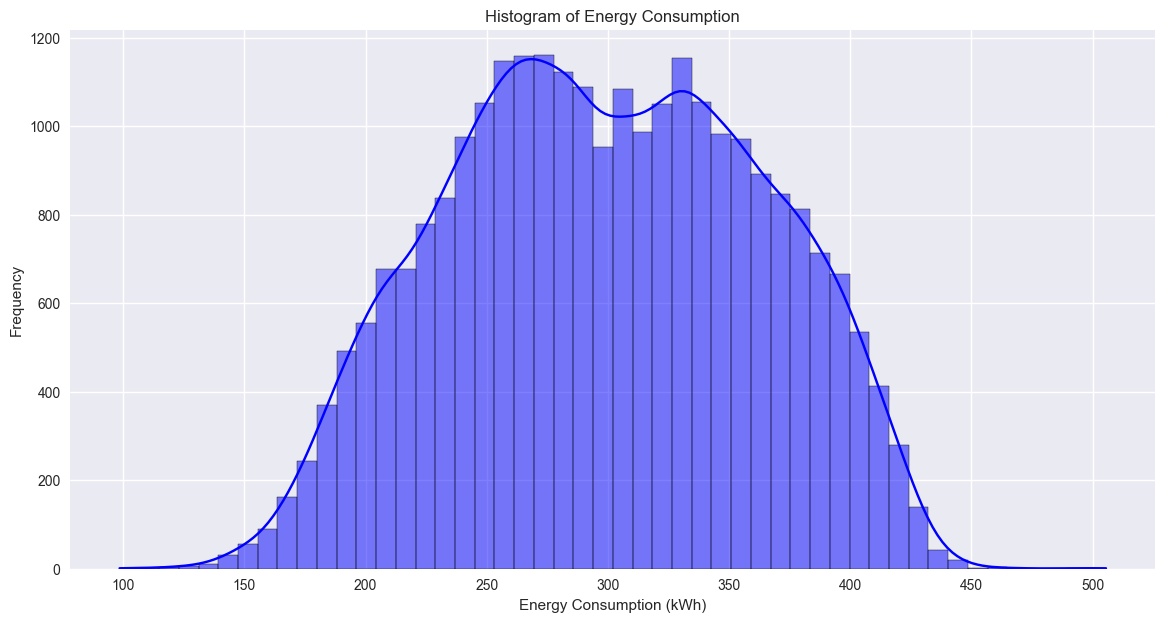

In [15]:
# Histogram of energy consumption
sns.histplot(df['energy_consumption'], bins=50, kde=True, color='blue')
plt.title('Histogram of Energy Consumption')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Frequency')
plt.show()

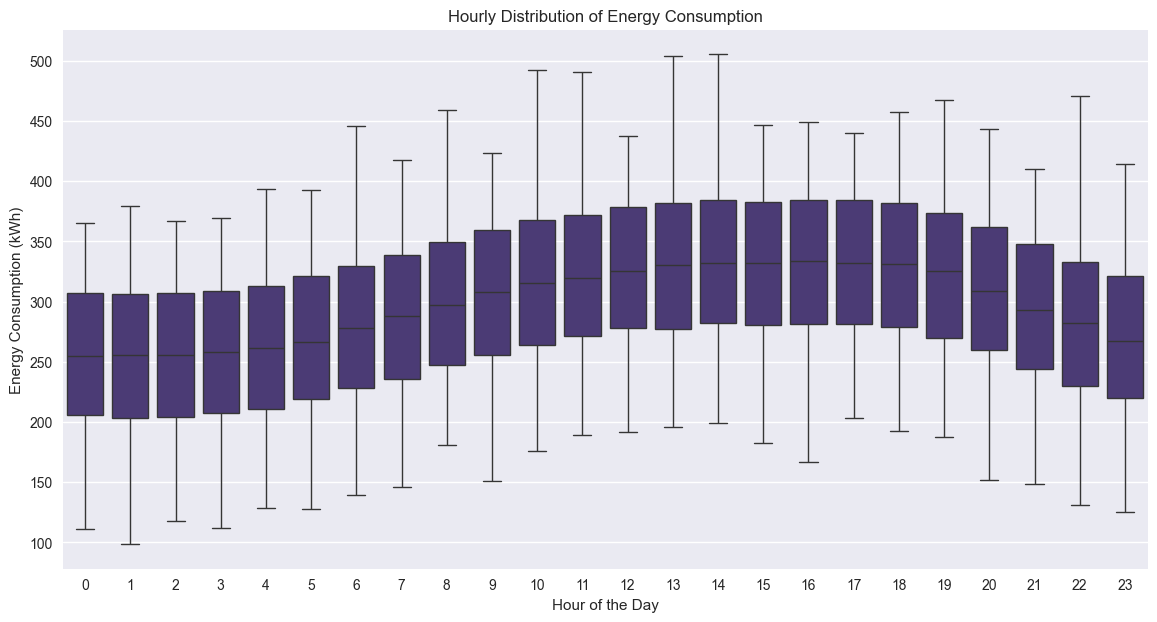

In [16]:
# Hourly distribution of energy consumption
sns.boxplot(x=df.index.hour, y=df['energy_consumption'])
plt.title('Hourly Distribution of Energy Consumption')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

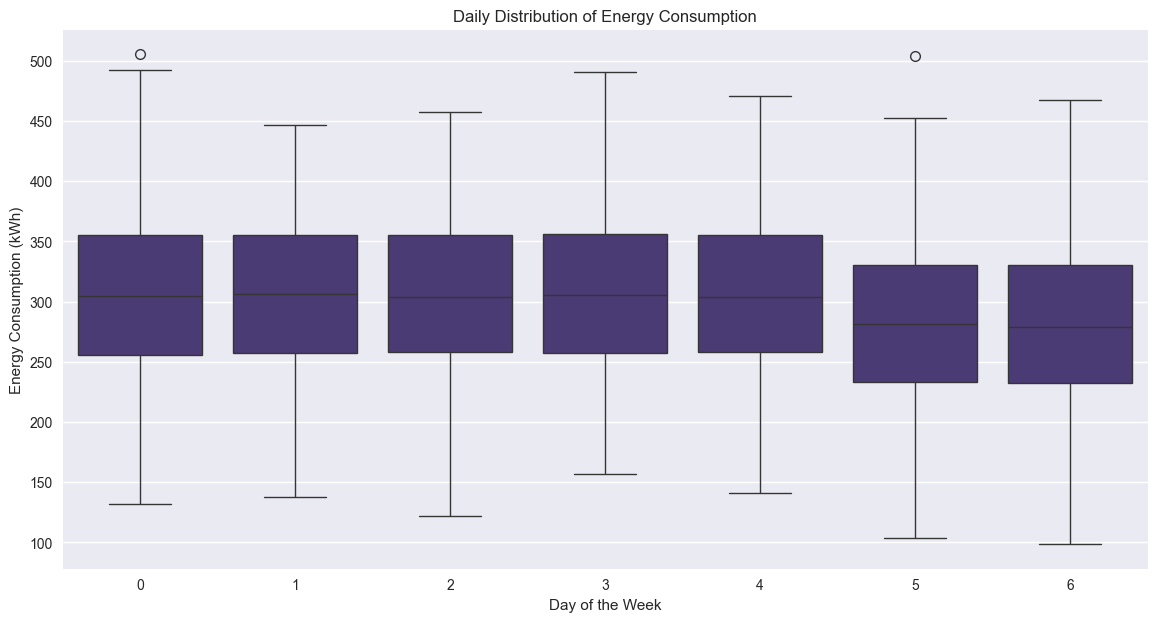

In [17]:
# Daily distribution of energy consumption
sns.boxplot(x=df.index.dayofweek, y=df['energy_consumption'])
plt.title('Daily Distribution of Energy Consumption')
plt.xlabel('Day of the Week')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

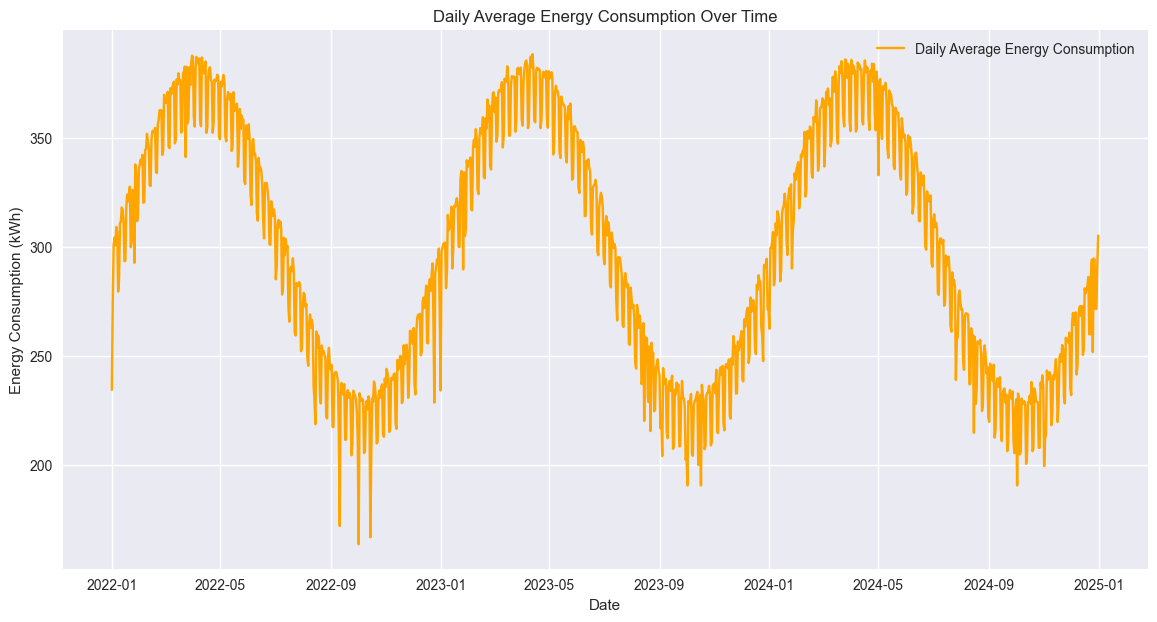

In [18]:
# Daily average energy consumption
daily_avg = df['energy_consumption'].resample('D').mean()

plt.plot(daily_avg.index, daily_avg, label='Daily Average Energy Consumption', color='orange')
plt.title('Daily Average Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()

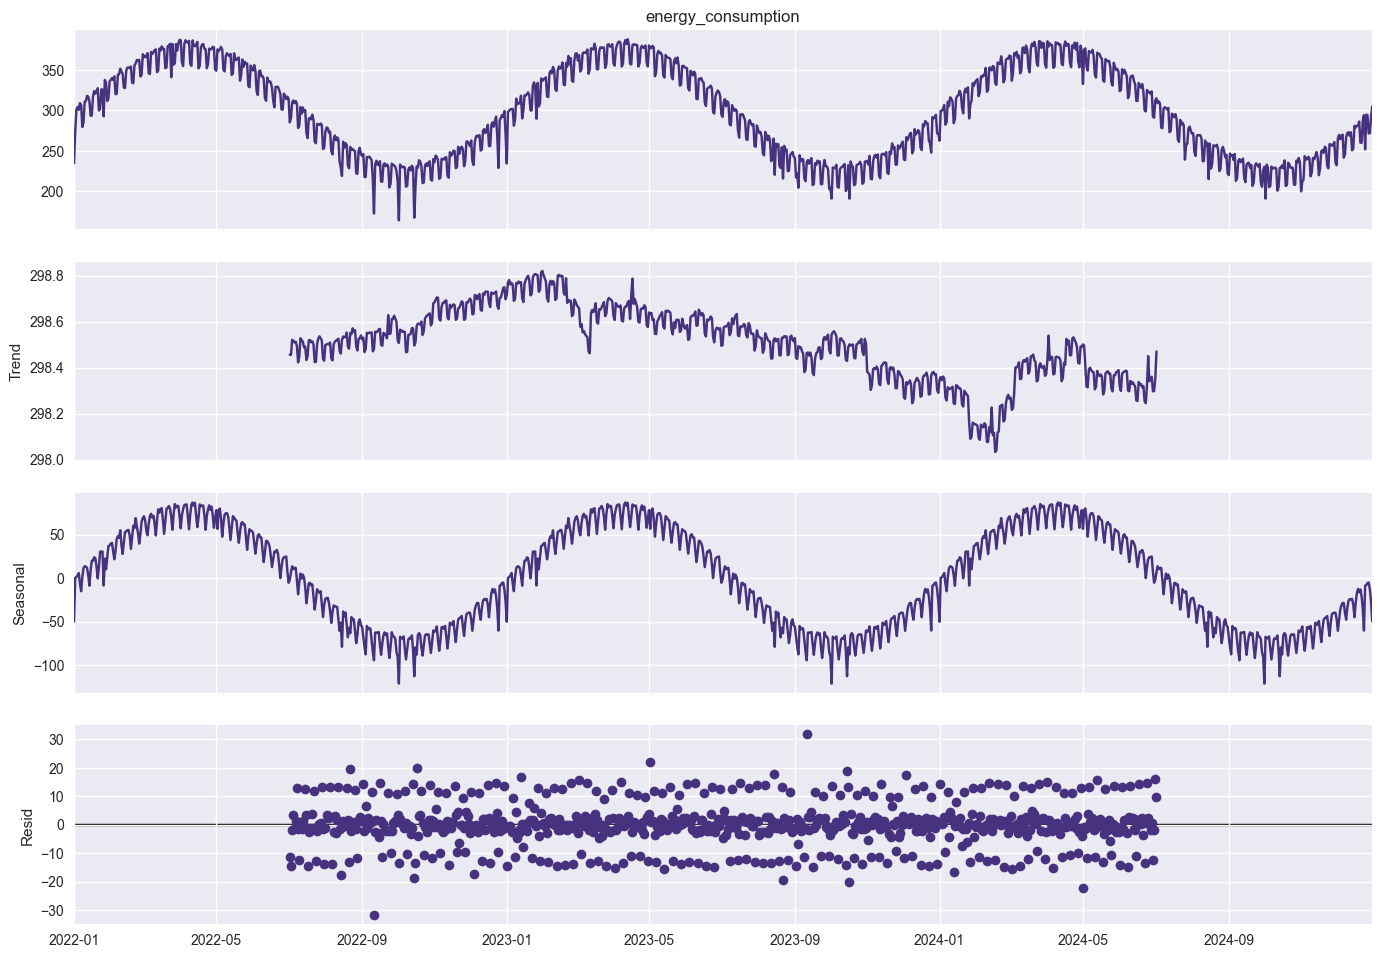

In [19]:
# Time series decomposition
decomposition = seasonal_decompose(daily_avg.dropna(), model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22000\2701873343.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_avg.index, y=holiday_avg.values, palette="viridis")


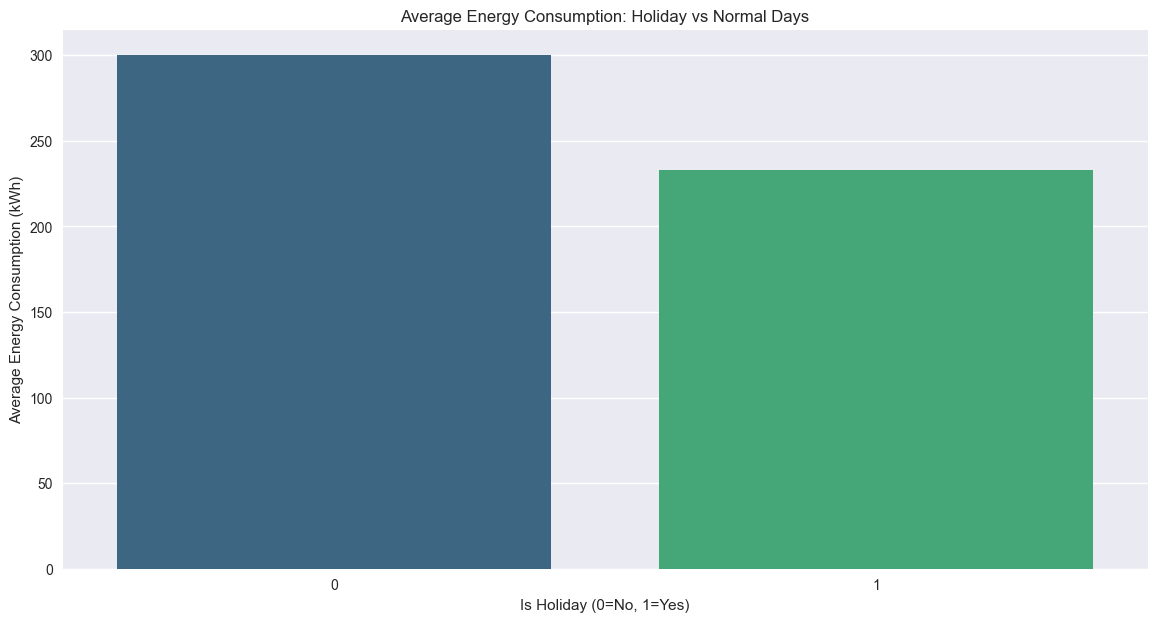

In [20]:
# Holiday vs Normal days analysis
# Assuming we have a 'is_holiday' column in the dataset
holiday_avg = df.groupby('is_holiday')['energy_consumption'].mean()

sns.barplot(x=holiday_avg.index, y=holiday_avg.values, palette="viridis")
plt.title('Average Energy Consumption: Holiday vs Normal Days')
plt.xlabel('Is Holiday (0=No, 1=Yes)')
plt.ylabel('Average Energy Consumption (kWh)')
plt.show()

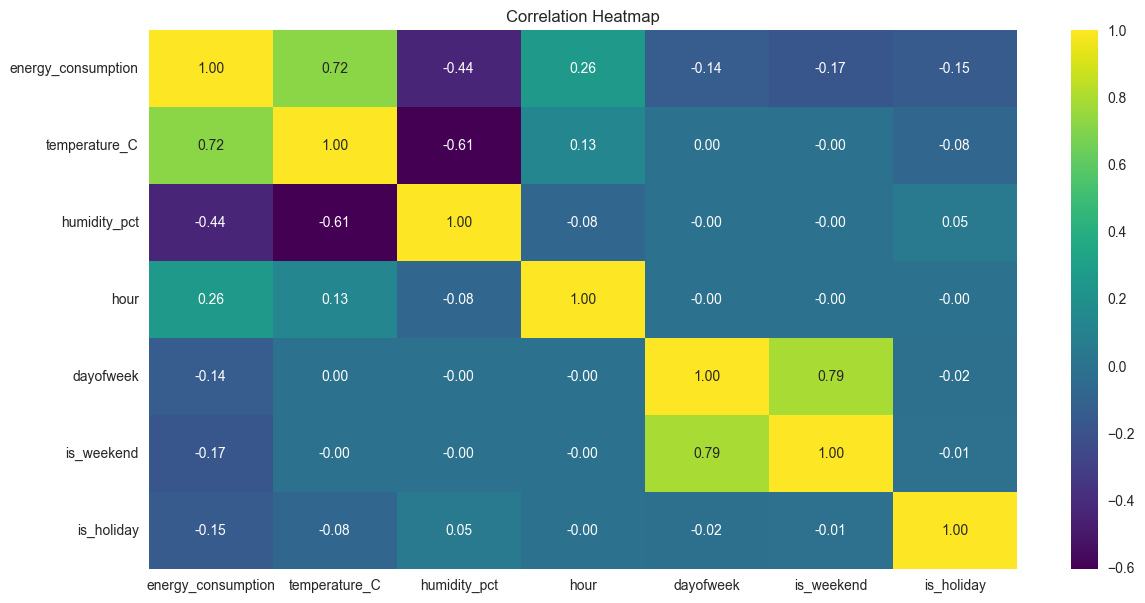

In [21]:
# Correlation Heatmap

sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Averages graphs 

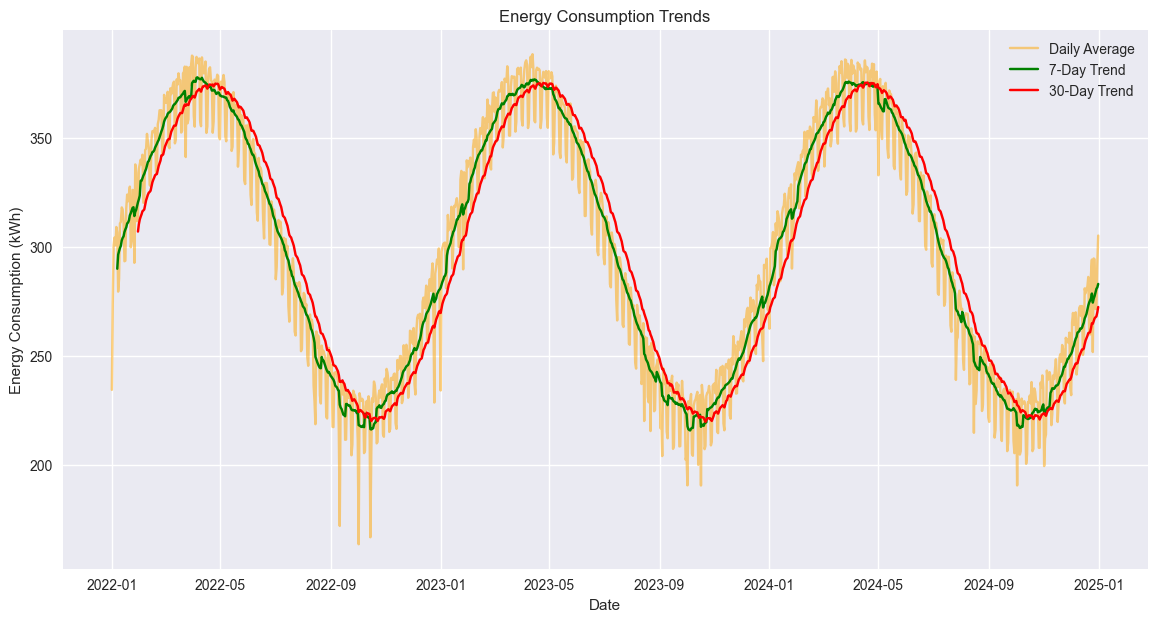

In [22]:
# 7 day and 30 day trends
weekly_trend = daily_avg.rolling(window=7).mean()
monthly_trend = daily_avg.rolling(window=30).mean()

plt.plot(daily_avg.index, daily_avg, label='Daily Average', color='orange', alpha=0.5)
plt.plot(weekly_trend.index, weekly_trend, label='7-Day Trend', color='green')
plt.plot(monthly_trend.index, monthly_trend, label='30-Day Trend', color='red')
plt.title('Energy Consumption Trends')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22000\879771256.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_avg.index, y=day_of_week_avg.values, palette="viridis")


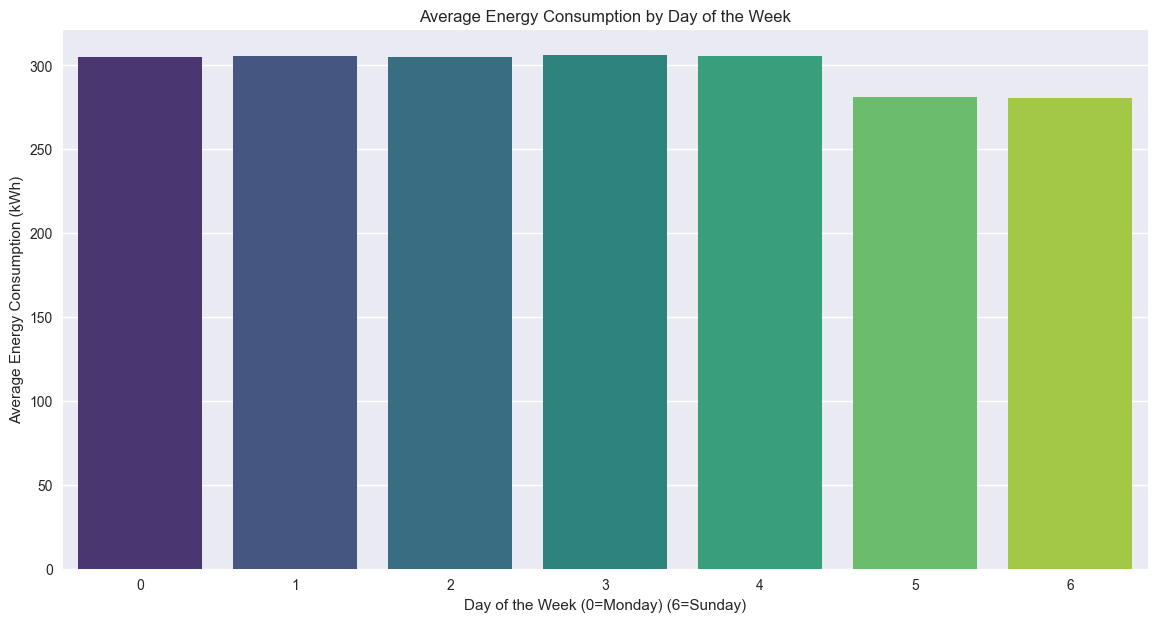

In [23]:
# Day of Week patterns
day_of_week_avg = df.groupby(df.index.dayofweek)['energy_consumption'].mean()

sns.barplot(x=day_of_week_avg.index, y=day_of_week_avg.values, palette="viridis")
plt.title('Average Energy Consumption by Day of the Week')
plt.xlabel('Day of the Week (0=Monday) (6=Sunday)')
plt.ylabel('Average Energy Consumption (kWh)')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22000\73157887.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_avg.index, y=month_avg.values, palette="viridis")


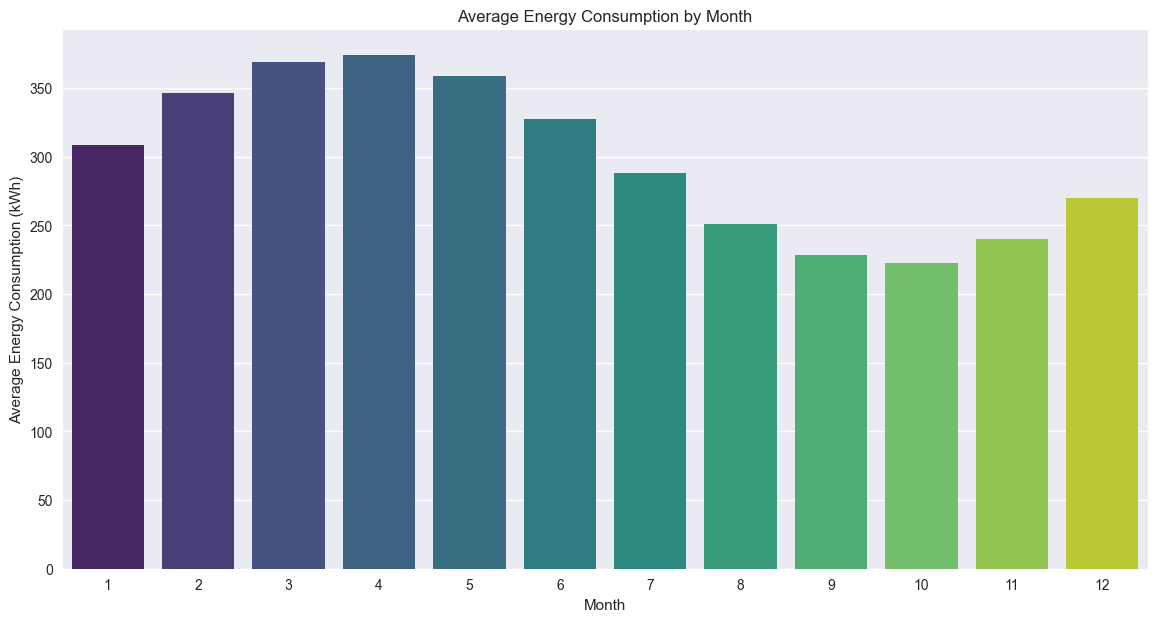

In [24]:
# Monthly patterns
month_avg = df.groupby(df.index.month)['energy_consumption'].mean()

sns.barplot(x=month_avg.index, y=month_avg.values, palette="viridis")
plt.title('Average Energy Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Average Energy Consumption (kWh)')
plt.show()

## Relational graphs

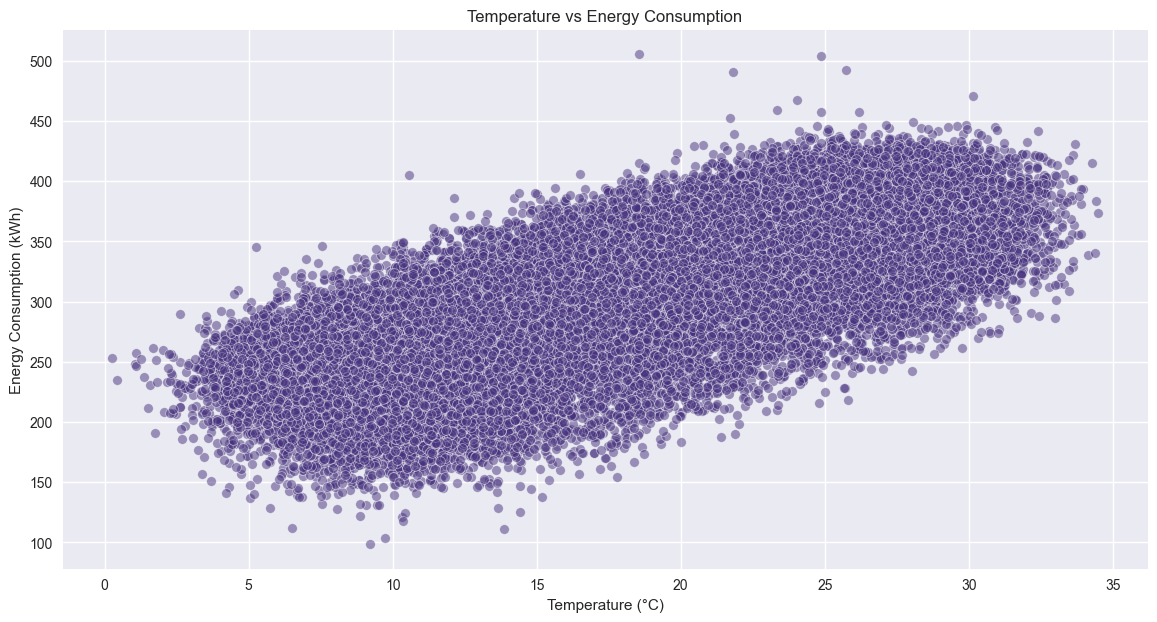

In [25]:
# Temperature vs Energy Consumption

sns.scatterplot(x='temperature_C', y='energy_consumption', data=df, alpha=0.5)
plt.title('Temperature vs Energy Consumption')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

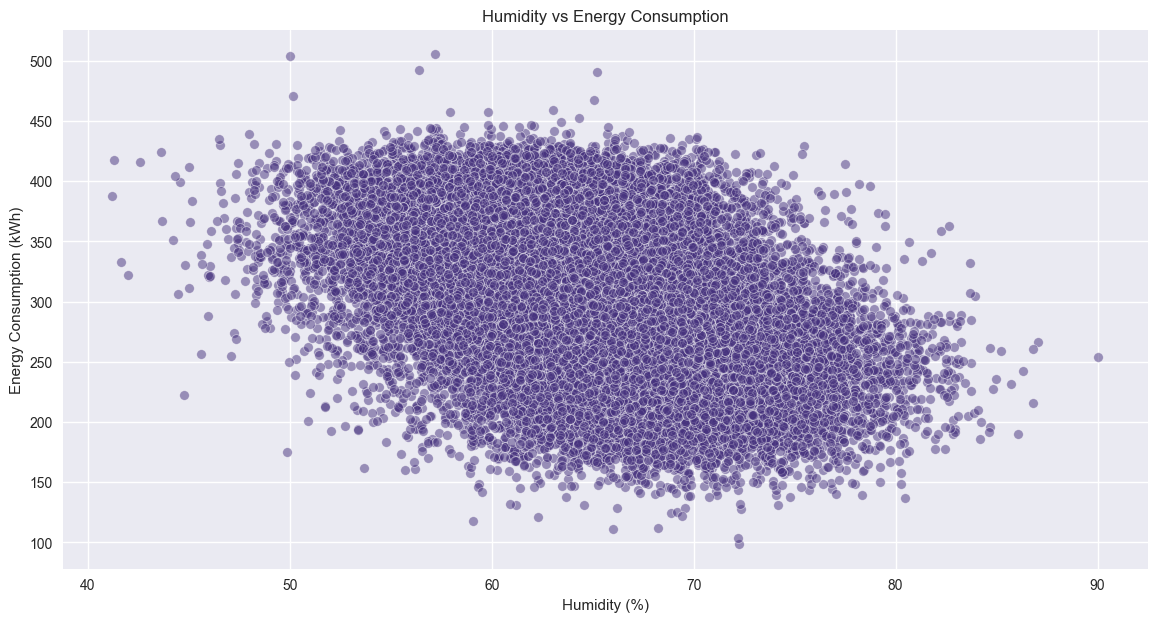

In [26]:
# Humidity vs Energy Consumption

sns.scatterplot(x='humidity_pct', y='energy_consumption', data=df, alpha=0.5)
plt.title('Humidity vs Energy Consumption')
plt.xlabel('Humidity (%)')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

Number of Outliers: 2


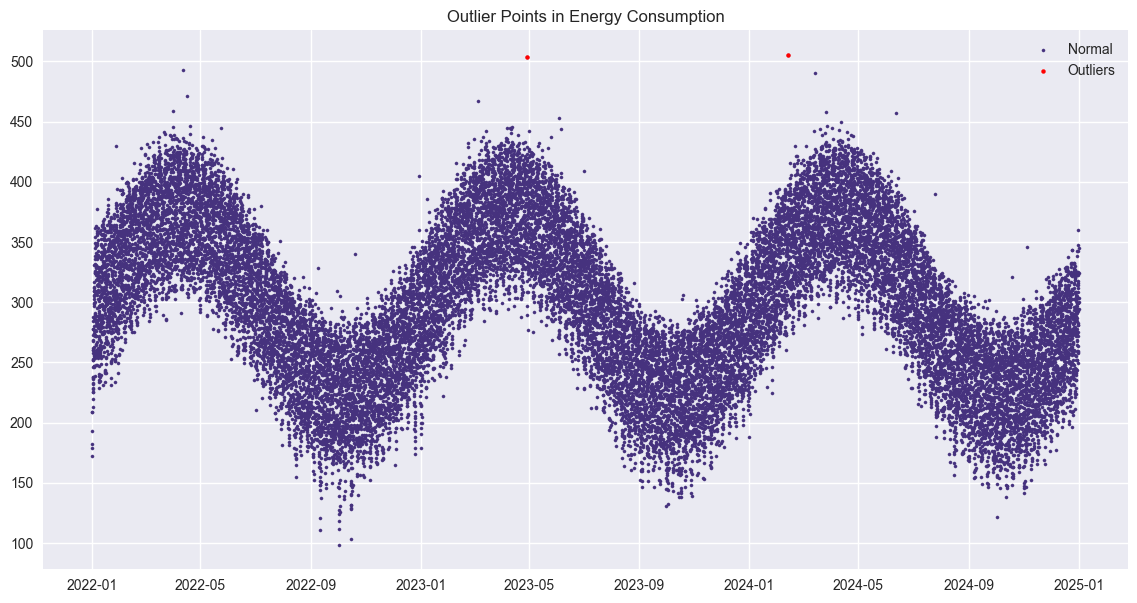

In [27]:
# Outlier detection using scatter plot
q1, q3 = df["energy_consumption"].quantile([0.25, 0.75])
iqr = q3 - q1
threshold = q3 + 1.5 * iqr

outliers = df[df["energy_consumption"] > threshold]

print("Number of Outliers:", len(outliers))

plt.scatter(df.index, df['energy_consumption'], s=5, label="Normal")
plt.scatter(outliers.index, outliers['energy_consumption'], color="red", s=8, label="Outliers")
plt.title("Outlier Points in Energy Consumption")
plt.legend()
plt.show()

## 🟩 📌 Final EDA Summary & Insights

## 1️⃣ Dataset Quality

- 3 years of hourly smart-meter data.

- 26,304 rows, only 263 missing values (1%), all cleaned with interpolation.

- No duplicate timestamps.

- Dataset is clean and stable for machine learning.

## 2️⃣ Outliers

- Identified 2 genuine outliers in energy_consumption.

- These represent realistic sudden spikes in usage.

- Outliers are kept intentionally because deep learning models like LSTM and MLP must learn to handle natural spikes in energy demand.

## 3️⃣ Seasonality

- Strong seasonal patterns were found:

- Hourly: Morning rise & evening peak

- Daily/Weekly: Lower consumption on weekends

- Monthly/Yearly: Higher usage in hotter months

- Holiday effect: Slight consumption drop


## This confirms that the dataset is well-suited for:

- LSTM/GRU (sequence modelling)

- MLP (tabular learning with engineered features)

- XGBoost/RandomForest


## 4️⃣ Weather Influence

- Energy consumption increases as temperature rises due to AC load.

- Moderate correlation with humidity as well.

- MLP & XGBoost benefit greatly from weather features.

## 5️⃣ Key Correlations

- Top correlated features:

 - Temperature

 - Hour of the day

 - Weekend flag

 - Day of week

 - Humidity

- These will become essential engineered features for the MLP model.

## ⭐ Final Conclusion

- The data is fully ready for modeling.

- It contains clear seasonal patterns, weather effects, outliers, and behavioral patterns that are ideal for building multiple forecasting models including:

- MLP (Multi-Layer Perceptron)

- LSTM / GRU (deep learning)

- XGBoost (tree-based)

Next, we can begin feature engineering and training MLP + LSTM + XGBoost to compare their forecasting performance.